The data for MMP-12 inhibitors was collected from literature. Here, the activity data is retrieved from ChEMBL database. The activity is recorded only as IC50. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as np
import seaborn as sns


In [5]:
df = pd.read_csv("chembl_activity.csv",sep=";")

In [6]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL237149,NaN,0,401.49,0,4.09,33,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,IC50,'=',...,Matrix metalloproteinase 12,Homo sapiens,SINGLE PROTEIN,CHEMBL1137466,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007,None,NaN
1,CHEMBL226439,NaN,0,318.35,0,0.53,16,COc1ccc(S(=O)(=O)N(CC(=O)NO)OC(C)C)cc1,IC50,NaN,...,Matrix metalloproteinase 12,Homo sapiens,SINGLE PROTEIN,CHEMBL2331497,1,Scientific Literature,Eur. J. Med. Chem.,2013,None,NaN
2,CHEMBL4066965,NaN,0,383.37,0,1.99,BDBM194638,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,IC50,'=',...,Matrix metalloproteinase 12,Homo sapiens,SINGLE PROTEIN,CHEMBL3886398,37,BindingDB Database,NaN,2015,None,NaN
3,CHEMBL1644424,NaN,0,428.43,0,4.33,3,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,IC50,'=',...,Matrix metalloproteinase 12,Homo sapiens,SINGLE PROTEIN,CHEMBL1641532,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2011,None,NaN
4,CHEMBL146718,NaN,0,452.53,0,3.37,1h,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,IC50,'=',...,Matrix metalloproteinase 12,Homo sapiens,SINGLE PROTEIN,CHEMBL1146709,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2004,None,NaN


In [7]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties'],
      dtype='object')

In [8]:
df= df[['Molecule ChEMBL ID','Smiles','Standard Relation','Standard Value','Standard Units', 'pChEMBL Value']]

In [9]:
df.head()

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units,pChEMBL Value
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,'=',5600.0,nM,5.25
1,CHEMBL226439,COc1ccc(S(=O)(=O)N(CC(=O)NO)OC(C)C)cc1,NaN,NaN,NaN,NaN
2,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,'=',9.0,nM,8.05
3,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,'=',3600.0,nM,5.44
4,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,'=',72.0,nM,7.14


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  580 non-null    object 
 1   Smiles              580 non-null    object 
 2   Standard Relation   539 non-null    object 
 3   Standard Value      540 non-null    float64
 4   Standard Units      541 non-null    object 
 5   pChEMBL Value       433 non-null    float64
dtypes: float64(2), object(4)
memory usage: 27.3+ KB


+ We can remove pChEMBL value column since there is a lot of missing values.

In [13]:
df.drop("pChEMBL Value",axis=1,inplace=True)

In [17]:
df.head()

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,'=',5600.0,nM
1,CHEMBL226439,COc1ccc(S(=O)(=O)N(CC(=O)NO)OC(C)C)cc1,NaN,NaN,NaN
2,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,'=',9.0,nM
3,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,'=',3600.0,nM
4,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,'=',72.0,nM


In [18]:
df.dropna(axis=0,inplace=True)

In [19]:
df.head()

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,'=',5600.0,nM
2,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,'=',9.0,nM
3,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,'=',3600.0,nM
4,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,'=',72.0,nM
5,CHEMBL148406,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,'=',191.0,nM


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 579
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  538 non-null    object 
 1   Smiles              538 non-null    object 
 2   Standard Relation   538 non-null    object 
 3   Standard Value      538 non-null    float64
 4   Standard Units      538 non-null    object 
dtypes: float64(1), object(4)
memory usage: 25.2+ KB


+ Checking Standard Relation column

In [21]:
df["Standard Relation"].value_counts() 

'='    458
'>'     78
'<'      2
Name: Standard Relation, dtype: int64

In [26]:
df[df["Standard Relation"] == "'>'"]

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
20,CHEMBL1796298,O=C(NCc1ccncn1)c1ccc(Oc2ccc(C#C[C@]3(O)CN4CCC3...,'>',10000.0,nM
21,CHEMBL1940315,O=C(NC1CCCS(=O)(=O)C1)c1ccc(Oc2ccc(C#C[C@]3(O)...,'>',10000.0,nM
22,CHEMBL1940314,O=C(NC1CCS(=O)(=O)CC1)c1ccc(Oc2ccc(C#C[C@]3(O)...,'>',10000.0,nM
38,CHEMBL1939876,CCOC(=O)c1cc2cc(-c3cc(C(=O)NCc4ccc(C(=O)O)cc4)...,'>',22000.0,nM
39,CHEMBL1940315,O=C(NC1CCCS(=O)(=O)C1)c1ccc(Oc2ccc(C#C[C@]3(O)...,'>',10000.0,nM
...,...,...,...,...,...
486,CHEMBL579026,Nc1nc2c(-c3cc(Cc4ccccc4)c(Br)[nH]3)nccc2[nH]1,'>',100000.0,nM
490,CHEMBL2437163,O=C(COc1ccc(Cl)cc1)NNC(=S)NCCCCC1CCCCC1,'>',100000.0,nM
538,CHEMBL1940296,CNC(=O)c1ccc(Oc2ccc(C#C[C@]3(O)CN4CCC3CC4)cc2)cc1,'>',100000.0,nM
550,CHEMBL4206785,CCCCC[C@@H](C(=O)NCNC(=O)c1cc2cccc(OC)c2o1)[C@...,'>',10000.0,nM


In [27]:
df[df["Standard Relation"] == "'<'"]

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
132,CHEMBL187092,C[C@@]1(O)CCCN(S(=O)(=O)c2ccc(OCc3ccc(F)cc3Cl)...,'<',1.0,nM
176,CHEMBL1935289,CC(C)[C@H](NS(=O)(=O)c1ccc2c(c1)oc1ccc(-c3cc[n...,'<',1.0,nM


+ Since we are building a classifiction model, we will keep all values.

In [29]:
df["Standard Units"].value_counts()

nM         536
ug.mL-1      1
µM           1
Name: Standard Units, dtype: int64

In [31]:
df = df[df["Standard Units"] == "nM"]

In [32]:
df.head()

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,'=',5600.0,nM
2,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,'=',9.0,nM
3,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,'=',3600.0,nM
4,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,'=',72.0,nM
5,CHEMBL148406,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,'=',191.0,nM


+ ### **Checking for duplicates**

In [33]:
df["Molecule ChEMBL ID"].value_counts()

CHEMBL19611     6
CHEMBL573715    4
CHEMBL573936    4
CHEMBL572982    3
CHEMBL230806    3
               ..
CHEMBL551655    1
CHEMBL523670    1
CHEMBL250058    1
CHEMBL583670    1
CHEMBL111856    1
Name: Molecule ChEMBL ID, Length: 485, dtype: int64

Handling duplicates is an important thing and can be done in various ways. One thing is to drop all duplicates. Other thing is to sort values in ascending or descending order and keeping only one value. 
One can replace all values with a new value (mean, median). Here we will calculate mean and standard deviation of each duplicates and remove molecules whose standard deviation is more than 2.

In [39]:
mean_std = df.groupby("Molecule ChEMBL ID").agg(["mean","std"])

In [42]:
mean_std

Standard Value          
                             mean       std
Molecule ChEMBL ID                         
CHEMBL111856               0.2400       NaN
CHEMBL1162966          64000.0000       NaN
CHEMBL116944               3.5000       NaN
CHEMBL118497               2.6000       NaN
CHEMBL12318           121000.0000       NaN
...                           ...       ...
CHEMBL77163                1.6990  0.001414
CHEMBL77258               14.0000       NaN
CHEMBL77995                3.9905  0.013435
CHEMBL78001               13.0000       NaN
CHEMBL78233               93.1650  0.233345

[485 rows x 2 columns]

In [46]:
df = df.merge(mean_std,how="inner",on="Molecule ChEMBL ID")

/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [48]:
df.sort_values("Molecule ChEMBL ID")

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units,"(Standard Value, mean)","(Standard Value, std)"
55,CHEMBL111856,O=C(NO)C1(NS(=O)(=O)c2ccc(Oc3ccc(F)cc3)cc2)CCOCC1,'=',0.240,nM,0.2400,NaN
431,CHEMBL1162966,O=C(OCc1ccc(C(F)(F)F)cc1)c1cccc(=O)[nH]1,'=',64000.000,nM,64000.0000,NaN
132,CHEMBL116944,C[C@@H](C[C@@H](CO)NC(=O)c1ccc(Oc2ccccc2)cc1)C...,'=',3.500,nM,3.5000,NaN
127,CHEMBL118497,C[C@@H](C[C@@H](COC(=O)CCC(=O)O)NC(=O)c1ccc(Oc...,'=',2.600,nM,2.6000,NaN
210,CHEMBL12318,O=P(O)(O)C(Cl)(Cl)P(=O)(O)O,'=',121000.000,nM,121000.0000,NaN
...,...,...,...,...,...,...,...
73,CHEMBL77995,CNC(=O)[C@@H](NC(=O)C(CCc1ccccc1)CP(=O)(O)Cc1c...,'=',4.000,nM,3.9905,0.013435
74,CHEMBL77995,CNC(=O)[C@@H](NC(=O)C(CCc1ccccc1)CP(=O)(O)Cc1c...,'=',3.981,nM,3.9905,0.013435
362,CHEMBL78001,CCCCC(CC(=O)NO)S(=O)(=O)c1ccc2ccccc2c1,'=',13.000,nM,13.0000,NaN
403,CHEMBL78233,CNC(=O)[C@@H](NC(=O)C(CCc1ccccc1)CP(=O)(O)Cc1c...,'=',93.000,nM,93.1650,0.233345


**There are NaN values. We will replace them with zero.**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 535
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Molecule ChEMBL ID      536 non-null    object 
 1   Smiles                  536 non-null    object 
 2   Standard Relation       536 non-null    object 
 3   Standard Value          536 non-null    float64
 4   Standard Units          536 non-null    object 
 5   (Standard Value, mean)  536 non-null    float64
 6   (Standard Value, std)   90 non-null     float64
dtypes: float64(3), object(4)
memory usage: 33.5+ KB


In [63]:
df.fillna(0,inplace=True)

In [65]:
df.head()

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units,"(Standard Value, mean)","(Standard Value, std)"
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,'=',5600.0,nM,5600.0,0.0
1,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,'=',9.0,nM,9.0,0.0
2,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,'=',9.0,nM,9.0,0.0
3,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,'=',3600.0,nM,3600.0,0.0
4,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,'=',72.0,nM,72.0,0.0


In [67]:
df = df[df[('Standard Value', 'std')] <= 2]

In [68]:
df.shape

(504, 7)

In [69]:
# Removing duplicates

df.drop_duplicates("Molecule ChEMBL ID",inplace=True,keep = "first")

/var/folders/ng/whnp3t611lq2k8dzf4hzhtnw0000gn/T/ipykernel_7063/594436729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates("Molecule ChEMBL ID",inplace=True,keep = "first")


In [70]:
df

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units,"(Standard Value, mean)","(Standard Value, std)"
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,'=',5600.0,nM,5600.0,0.0
1,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,'=',9.0,nM,9.0,0.0
3,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,'=',3600.0,nM,3600.0,0.0
4,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,'=',72.0,nM,72.0,0.0
5,CHEMBL148406,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,'=',191.0,nM,191.0,0.0
...,...,...,...,...,...,...,...
531,CHEMBL4741966,COc1ccc(CC[C@@H](NC(=O)[C@H](COCc2ccccc2)NC(C)...,'=',16.3,nM,16.3,0.0
532,CHEMBL4758924,CC(=O)N[C@@H](COCc1ccccc1)C(=O)N[C@H](CCc1cccc...,'=',20.9,nM,20.9,0.0
533,CHEMBL4755394,COc1ccc(CC[C@@H](NC(=O)[C@H](CCCc2ccccc2)NC(=O...,'=',4.5,nM,4.5,0.0
534,CHEMBL4759199,CC(=O)N[C@@H](COCc1ccccc1)C(=O)N[C@H](CCc1cccc...,'=',57.1,nM,57.1,0.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 535
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Molecule ChEMBL ID      474 non-null    object 
 1   Smiles                  474 non-null    object 
 2   Standard Relation       474 non-null    object 
 3   Standard Value          474 non-null    float64
 4   Standard Units          474 non-null    object 
 5   (Standard Value, mean)  474 non-null    float64
 6   (Standard Value, std)   474 non-null    float64
dtypes: float64(3), object(4)
memory usage: 29.6+ KB


In [72]:
df.columns

Index([      'Molecule ChEMBL ID',                   'Smiles',
              'Standard Relation',           'Standard Value',
                 'Standard Units', ('Standard Value', 'mean'),
        ('Standard Value', 'std')],
      dtype='object')

In [73]:
df = df[['Molecule ChEMBL ID','Smiles','Standard Value']]

In [74]:
df.head()

,Molecule ChEMBL ID,Smiles,Standard Value
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,5600.0
1,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,9.0
3,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,3600.0
4,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,72.0
5,CHEMBL148406,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,191.0


### Adding activity column

Molecule with IC50 less than 10 uM (10000 nM) will be considered active (1). Otherwise, it is inactive (0).

In [76]:
label = []

for i in df["Standard Value"]:
    if i <= 10000:
        label.append(1)
    else:
        label.append(0)
            

In [78]:
df["label"] = label

/var/folders/ng/whnp3t611lq2k8dzf4hzhtnw0000gn/T/ipykernel_7063/919931213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = label


In [79]:
df.head()

,Molecule ChEMBL ID,Smiles,Standard Value,label
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,5600.0,1
1,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,9.0,1
3,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,3600.0,1
4,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,72.0,1
5,CHEMBL148406,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,191.0,1


/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

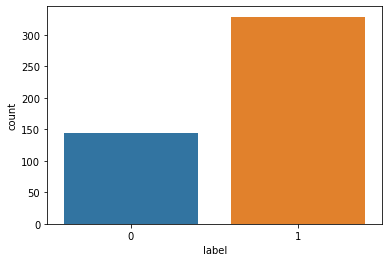

In [80]:
sns.countplot(df["label"])

In [81]:
df["label"].value_counts()

1    329
0    145
Name: label, dtype: int64

#### Number of actives is more than inactives. We will come to this later. 

### Converting pIC50

In [83]:
from math import log10

In [84]:
pIC50 = []

for i in df["Standard Value"]:
    molar = i*(10**-9)
    pIC50.append(-log10(molar))
    

In [86]:
df["pIC50"] = pIC50

/var/folders/ng/whnp3t611lq2k8dzf4hzhtnw0000gn/T/ipykernel_7063/179672600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pIC50"] = pIC50


In [87]:
df.head()

,Molecule ChEMBL ID,Smiles,Standard Value,label,pIC50
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,5600.0,1,5.251812
1,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,9.0,1,8.045757
3,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,3600.0,1,5.443697
4,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,72.0,1,7.142668
5,CHEMBL148406,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,191.0,1,6.718967


In [88]:
df.to_csv("dataset_clean.csv",sep="\t",header=True,index=None)